In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

In [3]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


# 1.1.	Identify the shape of the dataset

In [4]:
data.shape

(364558, 53)

# 1.2 	Identify variables with null values

In [5]:
for i in data.columns:
    if data[i].isna().sum()>0:
        print(i,'  ', data[i].isna().sum(),'   ', (data[i].isna().sum()/data.shape[0])*100)
        print()

Closed Date    2381     0.6531196682009447

Descriptor    6501     1.7832553393424366

Location Type    133     0.036482535015004466

Incident Zip    2998     0.8223657140976196

Incident Address    51699     14.181282539403881

Street Name    51699     14.181282539403881

Cross Street 1    57188     15.686941446902825

Cross Street 2    57805     15.856187492799501

Intersection Street 1    313438     85.97753992505993

Intersection Street 2    314046     86.14431722798567

Address Type    3252     0.8920391268330417

City    2997     0.8220914093230707

Landmark    364183     99.89713570954416

Facility Type    2389     0.655314106397336

Due Date    3     0.0008229143236467174

Resolution Action Updated Date    2402     0.6588800684664717

X Coordinate (State Plane)    4030     1.1054482414320903

Y Coordinate (State Plane)    4030     1.1054482414320903

School Region    1     0.00027430477454890576

School Code    1     0.00027430477454890576

School Zip    1     0.000274304774548

## checking for columns which have null values more than 30%

In [6]:
for i in data.columns:
    if (((data[i].isna().sum()/data.shape[0])*100)>30):
        print(i)
        

Intersection Street 1
Intersection Street 2
Landmark
School or Citywide Complaint
Vehicle Type
Taxi Company Borough
Taxi Pick Up Location
Bridge Highway Name
Bridge Highway Direction
Road Ramp
Bridge Highway Segment
Garage Lot Name
Ferry Direction
Ferry Terminal Name


## Removing the columns which have null values more than 30% 

In [7]:
for i in data.columns:
    if (((data[i].isna().sum()/data.shape[0])*100)>30):
        #print(i)
        data.drop(i,axis=1,inplace=True)

In [8]:
data.shape

(364558, 39)

In [9]:
for i in data.columns:
    if data[i].isna().sum()>0:
        print(i,'  ', data[i].isna().sum(),'   ', (data[i].isna().sum()/data.shape[0])*100)
        print()

Closed Date    2381     0.6531196682009447

Descriptor    6501     1.7832553393424366

Location Type    133     0.036482535015004466

Incident Zip    2998     0.8223657140976196

Incident Address    51699     14.181282539403881

Street Name    51699     14.181282539403881

Cross Street 1    57188     15.686941446902825

Cross Street 2    57805     15.856187492799501

Address Type    3252     0.8920391268330417

City    2997     0.8220914093230707

Facility Type    2389     0.655314106397336

Due Date    3     0.0008229143236467174

Resolution Action Updated Date    2402     0.6588800684664717

X Coordinate (State Plane)    4030     1.1054482414320903

Y Coordinate (State Plane)    4030     1.1054482414320903

School Region    1     0.00027430477454890576

School Code    1     0.00027430477454890576

School Zip    1     0.00027430477454890576

Latitude    4030     1.1054482414320903

Longitude    4030     1.1054482414320903

Location    4030     1.1054482414320903



In [10]:
data.columns #Getting the list of columns in the dataframe

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [11]:
redundantcol=['Agency Name','Descriptor','Location Type','Incident Address','Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type','Facility Type', 'Community Board', 'X Coordinate (State Plane)','Y Coordinate (State Plane)','Park Facility Name',
             'Park Borough','School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City','School State',
       'School Zip', 'School Not Found','Location']

In [12]:
data.drop(redundantcol,axis=1,inplace=True) #Dropping the irrevalent columns from data frame

In [13]:
# replacing the sapce in the name of the columns with _
data.columns=data.columns.str.replace(' ','_')
data.columns         

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Complaint_Type',
       'Incident_Zip', 'City', 'Status', 'Due_Date', 'Resolution_Description',
       'Resolution_Action_Updated_Date', 'Borough', 'Latitude', 'Longitude'],
      dtype='object')

In [14]:
data['Created_Date'].dtypes

dtype('O')

In [15]:
data['Created_Date']=pd.to_datetime(data['Created_Date']) 
#modifying the columns 'Crated_Date' from object to datetype

In [16]:
data['Created_Date'].head(1)

0   2015-12-31 23:59:45
Name: Created_Date, dtype: datetime64[ns]

In [17]:
data['Closed_Date']=pd.to_datetime(data['Closed_Date']) #modifying the columns 'Closed_Date' from object to datetype

In [18]:
data['Resolution_Action_Updated_Date']=pd.to_datetime(data['Resolution_Action_Updated_Date']) #modifying the columns 'Resolution_Action_Updated_Date' from object to datetype

In [19]:
data['Due_Date']= pd.to_datetime(data['Due_Date']) #modifying the columns 'Due_Date' from object to datetype

In [20]:
date_search = data.loc[(data['Closed_Date'].isna() & data['Resolution_Action_Updated_Date'].notna())] #checking where Closed_Date column having null values and Resolution_Action_Update_Date is not null

In [21]:
date_search.shape
index1 = date_search.index

In [22]:
date_search2 = data.loc[(data['Closed_Date'].notna() & data['Resolution_Action_Updated_Date'].isna())]# checking where Closed Date is nut null but Resolution Action updated date is null

In [23]:
date_search2.shape
index2 = date_search2.index

In [24]:
index2

Int64Index([175920, 175921, 175922, 175923, 175925, 175926, 175927, 175928,
            175929, 175930, 175931, 175932, 175933, 175937, 175938, 175939,
            175941, 175942, 175943, 175944, 175945, 175947, 175948, 175949,
            175950, 175951, 175952, 175953, 175956, 175958, 175961, 175962,
            175963, 175964, 175965, 175968, 175970, 175971, 294151],
           dtype='int64')

## filling null value for Closed date with Resolution Action Date

In [25]:
data.loc[(data['Closed_Date'].isna() & data['Resolution_Action_Updated_Date'].notna()),'Closed_Date'] = data['Resolution_Action_Updated_Date']

In [26]:
#to check
date_search = data.loc[(data['Closed_Date'].isna() & data['Resolution_Action_Updated_Date'].notna())]

In [27]:
date_search.shape

(0, 14)

## filling null values for Resolution Action Date with Closed Date

In [28]:
data.loc[(data['Closed_Date'].notna() & data['Resolution_Action_Updated_Date'].isna()),'Resolution_Action_Updated_Date'] = data['Closed_Date']

In [29]:
#to check
date_search2 = data.loc[(data['Closed_Date'].notna() & data['Resolution_Action_Updated_Date'].isna())]

In [30]:
date_search2.shape

(0, 14)

In [31]:
data.head(30)

,Unique_Key,Created_Date,Closed_Date,Agency,Complaint_Type,Incident_Zip,City,Status,Due_Date,Resolution_Description,Resolution_Action_Updated_Date,Borough,Latitude,Longitude
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,Noise - Street/Sidewalk,10034.0,NEW YORK,Closed,2016-01-01 07:59:45,The Police Department responded and upon arriv...,2016-01-01 00:55:15,MANHATTAN,40.865682,-73.923501
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,Blocked Driveway,11105.0,ASTORIA,Closed,2016-01-01 07:59:44,The Police Department responded to the complai...,2016-01-01 01:26:57,QUEENS,40.775945,-73.915094
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,Blocked Driveway,10458.0,BRONX,Closed,2016-01-01 07:59:29,The Police Department responded and upon arriv...,2016-01-01 04:51:03,BRONX,40.870325,-73.888525
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,Illegal Parking,10461.0,BRONX,Closed,2016-01-01 07:57:46,The Police Department responded to the complai...,2016-01-01 07:43:13,BRONX,40.835994,-73.828379
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,Illegal Parking,11373.0,ELMHURST,Closed,2016-01-01 07:56:58,The Police Department responded and upon arriv...,2016-01-01 03:24:42,QUEENS,40.733060,-73.874170
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,NYPD,Illegal Parking,11215.0,BROOKLYN,Closed,2016-01-01 07:56:30,The Police Department responded and upon arriv...,2016-01-01 01:50:11,BROOKLYN,40.660823,-73.992568
6,32306559,2015-12-31 23:55:32,2016-01-01 01:53:54,NYPD,Illegal Parking,10032.0,NEW YORK,Closed,2016-01-01 07:55:32,The Police Department issued a summons in resp...,2016-01-01 01:53:54,MANHATTAN,40.840848,-73.937375
7,32307009,2015-12-31 23:54:05,2016-01-01 01:42:54,NYPD,Blocked Driveway,10457.0,BRONX,Closed,2016-01-01 07:54:05,The Police Department responded to the complai...,2016-01-01 01:42:54,BRONX,40.837503,-73.902905
8,32308581,2015-12-31 23:53:58,2016-01-01 08:27:32,NYPD,Illegal Parking,11415.0,KEW GARDENS,Closed,2016-01-01 07:53:58,The Police Department responded to the complai...,2016-01-01 08:27:32,QUEENS,40.704977,-73.832605
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:40,NYPD,Blocked Driveway,11219.0,BROOKLYN,Closed,2016-01-01 07:53:58,The Police Department responded and upon arriv...,2016-01-01 01:17:40,BROOKLYN,40.623793,-73.999539


In [32]:
data['Incident_Zip'].unique()  #Finding the unique values for Incident_Zip

array([10034., 11105., 10458., 10461., 11373., 11215., 10032., 10457.,
       11415., 11219., 11372., 10453., 11208., 11379., 11374., 11412.,
       11217., 11234., 10026., 10456., 10030., 10467., 11432., 10031.,
       11419., 10024., 11201., 11216., 10462.,    nan, 11385., 11414.,
       11213., 11375., 11211., 10312., 10017., 11417., 10002., 10027.,
       11209., 10035., 11418., 11421., 11205., 10468., 11355., 11358.,
       11210., 11368., 11427., 11436., 10308., 11364., 10011., 11423.,
       11230., 10003., 11221., 11416., 11378., 11236., 11218., 10029.,
       10028., 11214., 11207., 11369., 11223., 11220., 10302., 11420.,
       11354., 10473., 10301., 11103., 10465., 11377., 11212., 11365.,
       10472., 10452., 11203., 10469., 11237., 11434., 11101., 10460.,
       11229., 11206., 11102., 10466., 10009., 10033., 11694., 10022.,
       10470., 11433., 11428., 11413., 10463., 10471., 10474., 11228.,
       10014., 10475., 11225., 11233., 11370., 11204., 11435., 10459.,
      

In [36]:
duedate = data.loc[(data.Due_Date.isna() & data.Resolution_Action_Updated_Date.notna())]


In [37]:
duedate

,Unique_Key,Created_Date,Closed_Date,Agency,Complaint_Type,Incident_Zip,City,Status,Due_Date,Resolution_Description,Resolution_Action_Updated_Date,Borough,Latitude,Longitude
161610,31227876,2015-08-03 08:28:29,2015-10-05 11:09:57,NYPD,Ferry Complaint,NaN,NaN,Open,NaT,The Department of Transportation contacted the...,2015-10-05 11:09:57,Unspecified,NaN,NaN
175921,31129107,2015-07-21 16:05:39,2015-07-21 21:56:38,NYPD,Blocked Driveway,11219.0,BROOKLYN,Draft,NaT,The Police Department responded to the complai...,2015-07-21 21:56:38,BROOKLYN,40.625772,-73.999564


## Filling null values for due date with Resolution Action Updated Date

In [38]:
data.loc[(data.Due_Date.isna() & data.Resolution_Action_Updated_Date.notna()), 'Due_Date'] = data.Resolution_Action_Updated_Date


## Checking for City' null Value comparing with Incident_Zip not value

In [39]:
data.loc[(data.City.isna() & data.Incident_Zip.notna()), ['City','Incident_Zip']]


,City,Incident_Zip
42673,NaN,10021.0
99128,NaN,10021.0
250540,NaN,10022.0


In [40]:
data.loc[(data.Incident_Zip==10021), ['City','Incident_Zip']].mode()

,City,Incident_Zip
0,NEW YORK,10021.0


In [41]:
data.loc[(data.City.isna() & data.Incident_Zip.notna()), ['City']]='NEW YORK'

In [42]:
data.loc[(data.City.isna() & data.Incident_Zip.notna()), ['City','Incident_Zip']]

,City,Incident_Zip


In [43]:
data.loc[(data.City.notna() & data.Incident_Zip.isna()), ['City','Incident_Zip']]

,City,Incident_Zip
111184,NEW YORK,NaN
117502,BRONX,NaN
218640,BRONX,NaN
283132,QUEENS,NaN


In [44]:
data.loc[(data.City=='QUEENS'), ['City','Incident_Zip']].mode() #Getting the City and Incident Zip where City is Queen

,City,Incident_Zip
0,QUEENS,11208.0


In [45]:
data.loc[(data.City=='QUEENS')& (data.Incident_Zip.isna()), ['Incident_Zip']]=11208 

In [46]:
data.loc[(data.City=='BRONX'), ['City','Incident_Zip']].mode()

,City,Incident_Zip
0,BRONX,10472.0


In [47]:
data.loc[(data.City=='BRONX')& (data.Incident_Zip.isna()), ['Incident_Zip']]=10472

In [48]:
data.loc[(data.City=='NEW YORK'), ['City','Incident_Zip']].mode()

,City,Incident_Zip
0,NEW YORK,10034.0


In [49]:
data.loc[(data.City=='NEW YORK')& (data.Incident_Zip.isna()), ['Incident_Zip']]=10034

In [50]:
for i in data.columns:
    if data[i].isna().sum()>0:
        print(i,'  ', data[i].isna().sum(),'   ', (data[i].isna().sum()/data.shape[0])*100)
        print()

Closed_Date    2363     0.6481821822590643

Incident_Zip    2994     0.8212684949994239

City    2994     0.8212684949994239

Due_Date    1     0.00027430477454890576

Resolution_Action_Updated_Date    2363     0.6481821822590643

Latitude    4030     1.1054482414320903

Longitude    4030     1.1054482414320903



In [51]:
data.loc[(data.Latitude.isna())].index

Int64Index([    33,    283,    302,    416,    434,    611,   1328,   1421,
              1648,   1816,
            ...
            363376, 363378, 363614, 363643, 363718, 363789, 363805, 364053,
            364151, 364349],
           dtype='int64', length=4030)

In [52]:
data.drop(data.loc[(data.Latitude.isna())].index,axis=0,inplace=True) 

In [53]:
for i in data.columns:
    if data[i].isna().sum()>0:
        print(i,'  ', data[i].isna().sum(),'   ', (data[i].isna().sum()/data.shape[0])*100)
        print()

Closed_Date    41     0.011372209648071717

Incident_Zip    38     0.010540096746993298

City    38     0.010540096746993298

Resolution_Action_Updated_Date    41     0.011372209648071717



In [54]:
data.loc[(data.City.isna() & data.Incident_Zip.isna()), ['City','Incident_Zip']].shape

(38, 2)

In [55]:
data.loc[(data.City.isna() & data.Incident_Zip.isna())].index

Int64Index([ 15584,  68250,  68254,  87700,  89608,  94371,  96165,  96444,
            102888, 103794, 105116, 106112, 106639, 107485, 109059, 112855,
            118589, 120350, 121605, 123942, 124404, 126657, 127867, 136037,
            160354, 165926, 173891, 175048, 176049, 184907, 198728, 201028,
            206044, 207259, 234178, 255837, 279426, 286737],
           dtype='int64')

## Dropping incident zip and City

In [56]:
#data.drop(data.loc[(data.Latitude.isna())].index,axis=0,inplace=True)
data.drop(data.loc[(data.City.isna() & data.Incident_Zip.isna())].index,axis=0,inplace=True)

In [57]:
data.isna().sum()

Unique_Key                         0
Created_Date                       0
Closed_Date                       41
Agency                             0
Complaint_Type                     0
Incident_Zip                       0
City                               0
Status                             0
Due_Date                           0
Resolution_Description             0
Resolution_Action_Updated_Date    41
Borough                            0
Latitude                           0
Longitude                          0
dtype: int64

In [58]:
data.loc[(data.Closed_Date.isna()& data.Resolution_Action_Updated_Date.isna()),['Status']].value_counts()

Status  
Open        28
Assigned    12
Draft        1
dtype: int64

In [59]:
data.dropna(axis=0,inplace=True)

In [60]:
data.isna().sum()

Unique_Key                        0
Created_Date                      0
Closed_Date                       0
Agency                            0
Complaint_Type                    0
Incident_Zip                      0
City                              0
Status                            0
Due_Date                          0
Resolution_Description            0
Resolution_Action_Updated_Date    0
Borough                           0
Latitude                          0
Longitude                         0
dtype: int64

In [61]:
data.head()

,Unique_Key,Created_Date,Closed_Date,Agency,Complaint_Type,Incident_Zip,City,Status,Due_Date,Resolution_Description,Resolution_Action_Updated_Date,Borough,Latitude,Longitude
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,Noise - Street/Sidewalk,10034.0,NEW YORK,Closed,2016-01-01 07:59:45,The Police Department responded and upon arriv...,2016-01-01 00:55:15,MANHATTAN,40.865682,-73.923501
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,Blocked Driveway,11105.0,ASTORIA,Closed,2016-01-01 07:59:44,The Police Department responded to the complai...,2016-01-01 01:26:57,QUEENS,40.775945,-73.915094
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,Blocked Driveway,10458.0,BRONX,Closed,2016-01-01 07:59:29,The Police Department responded and upon arriv...,2016-01-01 04:51:03,BRONX,40.870325,-73.888525
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,Illegal Parking,10461.0,BRONX,Closed,2016-01-01 07:57:46,The Police Department responded to the complai...,2016-01-01 07:43:13,BRONX,40.835994,-73.828379
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,Illegal Parking,11373.0,ELMHURST,Closed,2016-01-01 07:56:58,The Police Department responded and upon arriv...,2016-01-01 03:24:42,QUEENS,40.733060,-73.874170


# 3.Draw a frequency plot for city-wise complaints

In [62]:
data.City.unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [63]:
data.loc[data['City']=='NEW YORK']

,Unique_Key,Created_Date,Closed_Date,Agency,Complaint_Type,Incident_Zip,City,Status,Due_Date,Resolution_Description,Resolution_Action_Updated_Date,Borough,Latitude,Longitude
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,Noise - Street/Sidewalk,10034.0,NEW YORK,Closed,2016-01-01 07:59:45,The Police Department responded and upon arriv...,2016-01-01 00:55:15,MANHATTAN,40.865682,-73.923501
6,32306559,2015-12-31 23:55:32,2016-01-01 01:53:54,NYPD,Illegal Parking,10032.0,NEW YORK,Closed,2016-01-01 07:55:32,The Police Department issued a summons in resp...,2016-01-01 01:53:54,MANHATTAN,40.840848,-73.937375
19,32308195,2015-12-31 23:40:55,2016-01-01 00:28:31,NYPD,Noise - Street/Sidewalk,10026.0,NEW YORK,Closed,2016-01-01 07:40:55,The Police Department responded to the complai...,2016-01-01 00:28:31,MANHATTAN,40.805267,-73.953353
23,32308765,2015-12-31 23:32:46,2016-01-01 00:25:21,NYPD,Illegal Parking,10030.0,NEW YORK,Closed,2016-01-01 07:32:46,The Police Department responded to the complai...,2016-01-01 00:25:21,MANHATTAN,40.814002,-73.942664
26,32305916,2015-12-31 23:26:41,2015-12-31 23:53:31,NYPD,Noise - House of Worship,10031.0,NEW YORK,Closed,2016-01-01 07:26:41,The Police Department responded to the complai...,2015-12-31 23:53:31,MANHATTAN,40.826102,-73.945663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364542,29607990,2015-01-01 00:19:20,2015-01-01 03:17:10,NYPD,Noise - Street/Sidewalk,10040.0,NEW YORK,Closed,2015-01-01 08:19:20,The Police Department responded and upon arriv...,2015-01-01 03:17:10,MANHATTAN,40.854558,-73.928795
364543,29609631,2015-01-01 00:18:49,2015-01-01 03:17:11,NYPD,Noise - Street/Sidewalk,10040.0,NEW YORK,Closed,2015-01-01 08:18:49,The Police Department responded to the complai...,2015-01-01 03:17:11,MANHATTAN,40.854558,-73.928795
364547,29608295,2015-01-01 00:15:33,2015-01-01 00:56:37,NYPD,Noise - Street/Sidewalk,10002.0,NEW YORK,Closed,2015-01-01 08:15:33,The Police Department reviewed your complaint ...,2015-01-01 00:56:37,MANHATTAN,40.720656,-73.988063
364552,29610051,2015-01-01 00:05:05,2015-01-01 01:22:10,NYPD,Noise - Street/Sidewalk,10002.0,NEW YORK,Closed,2015-01-01 08:05:05,The Police Department made an arrest in respon...,2015-01-01 01:22:10,MANHATTAN,40.721235,-73.987770


In [64]:
gk=data.groupby('City')

In [65]:
gk.first()

,Unique_Key,Created_Date,Closed_Date,Agency,Complaint_Type,Incident_Zip,Status,Due_Date,Resolution_Description,Resolution_Action_Updated_Date,Borough,Latitude,Longitude
City,,,,,,,,,,,,,
ARVERNE,32280961,2015-12-27 11:15:21,2015-12-27 14:23:11,NYPD,Illegal Parking,11692.0,Closed,2015-12-27 19:15:21,The Police Department responded to the complai...,2015-12-27 14:23:11,QUEENS,40.590209,-73.790313
ASTORIA,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,Blocked Driveway,11105.0,Closed,2016-01-01 07:59:44,The Police Department responded to the complai...,2016-01-01 01:26:57,QUEENS,40.775945,-73.915094
Astoria,31790269,2015-10-19 06:57:08,2015-10-19 09:50:37,NYPD,Illegal Parking,11106.0,Closed,2015-10-19 14:57:08,The Police Department responded to the complai...,2015-10-19 09:50:37,QUEENS,40.763915,-73.922542
BAYSIDE,32309943,2015-12-31 13:28:00,2015-12-31 15:11:49,NYPD,Blocked Driveway,11361.0,Closed,2015-12-31 21:28:00,The Police Department responded to the complai...,2015-12-31 15:11:49,QUEENS,40.761594,-73.767825
BELLEROSE,32300494,2015-12-31 01:14:35,2015-12-31 05:12:15,NYPD,Derelict Vehicle,11426.0,Closed,2015-12-31 09:14:35,The Police Department responded to the complai...,2015-12-31 05:12:15,QUEENS,40.742831,-73.723265
BREEZY POINT,32181257,2015-12-11 13:58:46,2015-12-11 14:58:58,NYPD,Noise - Street/Sidewalk,11697.0,Closed,2015-12-11 21:58:46,The Police Department responded to the complai...,2015-12-11 14:58:58,QUEENS,40.566799,-73.886746
BRONX,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,Blocked Driveway,10458.0,Closed,2016-01-01 07:59:29,The Police Department responded and upon arriv...,2016-01-01 04:51:03,BRONX,40.870325,-73.888525
BROOKLYN,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,NYPD,Illegal Parking,11215.0,Closed,2016-01-01 07:56:30,The Police Department responded and upon arriv...,2016-01-01 01:50:11,BROOKLYN,40.660823,-73.992568
CAMBRIA HEIGHTS,32300507,2015-12-30 21:08:48,2015-12-31 01:15:34,NYPD,Derelict Vehicle,11411.0,Closed,2015-12-31 05:08:48,The Police Department responded to the complai...,2015-12-31 01:15:34,QUEENS,40.693840,-73.738808


In [66]:
r=pd.crosstab(data['City'], data['Complaint_Type'])

In [67]:
r

Complaint_Type,Animal Abuse,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,46,0,50,32,2,1,1,4,0,62,...,14,2,29,9,1,0,0,1,1,1
ASTORIA,170,16,3436,426,5,43,4,32,4,1337,...,21,64,408,236,2,3,0,60,10,57
Astoria,0,0,159,14,0,0,0,0,0,277,...,0,0,145,0,0,0,0,0,0,0
BAYSIDE,53,0,514,231,2,1,3,2,0,637,...,3,3,17,24,0,0,0,9,0,2
BELLEROSE,15,1,138,120,2,1,0,1,1,132,...,1,1,13,11,1,1,0,9,1,0
BREEZY POINT,2,0,3,3,0,1,0,0,0,16,...,0,0,1,1,0,0,0,0,0,0
BRONX,1967,22,17052,2399,66,206,15,274,24,9857,...,90,523,9119,3545,20,18,0,426,54,431
BROOKLYN,3186,121,36433,6245,79,291,60,939,60,33461,...,387,1558,13945,5933,48,58,0,1253,155,575
CAMBRIA HEIGHTS,15,0,177,148,0,0,0,6,1,113,...,2,0,29,100,0,0,0,7,0,0


In [68]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='City'>

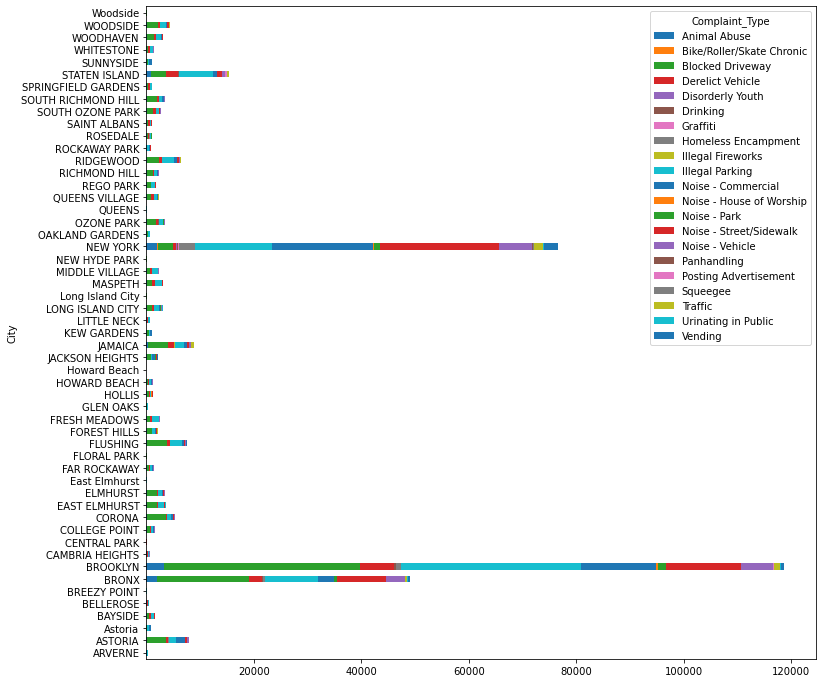

In [69]:
r.plot(kind='barh',stacked=True,figsize=(12,12))

Observation:-  BROOKLYN have the most complaint types. Complaint types are Blocked Driverway.

In [70]:
r

Complaint_Type,Animal Abuse,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,46,0,50,32,2,1,1,4,0,62,...,14,2,29,9,1,0,0,1,1,1
ASTORIA,170,16,3436,426,5,43,4,32,4,1337,...,21,64,408,236,2,3,0,60,10,57
Astoria,0,0,159,14,0,0,0,0,0,277,...,0,0,145,0,0,0,0,0,0,0
BAYSIDE,53,0,514,231,2,1,3,2,0,637,...,3,3,17,24,0,0,0,9,0,2
BELLEROSE,15,1,138,120,2,1,0,1,1,132,...,1,1,13,11,1,1,0,9,1,0
BREEZY POINT,2,0,3,3,0,1,0,0,0,16,...,0,0,1,1,0,0,0,0,0,0
BRONX,1967,22,17052,2399,66,206,15,274,24,9857,...,90,523,9119,3545,20,18,0,426,54,431
BROOKLYN,3186,121,36433,6245,79,291,60,939,60,33461,...,387,1558,13945,5933,48,58,0,1253,155,575
CAMBRIA HEIGHTS,15,0,177,148,0,0,0,6,1,113,...,2,0,29,100,0,0,0,7,0,0


In [71]:
data1=data.loc[data['City']=='BROOKLYN']

In [72]:
data.City = data.City.str.upper()
data.City = data.City.str.replace(' ','_')

In [73]:
cities = data['City'].unique()

for i in range(len(cities)):
       exec("df_{} = data.loc[(data['City'] == '{}',['Complaint_Type','Created_Date','Closed_Date'])]".format(cities[i],cities[i]))

In [74]:
data.City.unique()

array(['NEW_YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW_GARDENS', 'JACKSON_HEIGHTS', 'MIDDLE_VILLAGE', 'REGO_PARK',
       'SAINT_ALBANS', 'JAMAICA', 'SOUTH_RICHMOND_HILL', 'RIDGEWOOD',
       'HOWARD_BEACH', 'FOREST_HILLS', 'STATEN_ISLAND', 'OZONE_PARK',
       'RICHMOND_HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS_VILLAGE', 'OAKLAND_GARDENS', 'HOLLIS', 'MASPETH',
       'EAST_ELMHURST', 'SOUTH_OZONE_PARK', 'WOODSIDE', 'FRESH_MEADOWS',
       'LONG_ISLAND_CITY', 'ROCKAWAY_PARK', 'SPRINGFIELD_GARDENS',
       'COLLEGE_POINT', 'BAYSIDE', 'GLEN_OAKS', 'FAR_ROCKAWAY',
       'BELLEROSE', 'LITTLE_NECK', 'CAMBRIA_HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL_PARK',
       'NEW_HYDE_PARK', 'CENTRAL_PARK', 'BREEZY_POINT', 'QUEENS'],
      dtype=object)

In [75]:
df_NEW_YORK

,Complaint_Type,Created_Date,Closed_Date
0,Noise - Street/Sidewalk,2015-12-31 23:59:45,2016-01-01 00:55:15
6,Illegal Parking,2015-12-31 23:55:32,2016-01-01 01:53:54
19,Noise - Street/Sidewalk,2015-12-31 23:40:55,2016-01-01 00:28:31
23,Illegal Parking,2015-12-31 23:32:46,2016-01-01 00:25:21
26,Noise - House of Worship,2015-12-31 23:26:41,2015-12-31 23:53:31
...,...,...,...
364542,Noise - Street/Sidewalk,2015-01-01 00:19:20,2015-01-01 03:17:10
364543,Noise - Street/Sidewalk,2015-01-01 00:18:49,2015-01-01 03:17:11
364547,Noise - Street/Sidewalk,2015-01-01 00:15:33,2015-01-01 00:56:37
364552,Noise - Street/Sidewalk,2015-01-01 00:05:05,2015-01-01 01:22:10


In [76]:
df_ASTORIA

,Complaint_Type,Created_Date,Closed_Date
1,Blocked Driveway,2015-12-31 23:59:44,2016-01-01 01:26:57
66,Noise - Commercial,2015-12-31 22:48:03,2016-01-01 00:01:58
107,Noise - Commercial,2015-12-31 22:20:26,2016-01-01 01:23:32
143,Blocked Driveway,2015-12-31 21:13:34,2016-01-01 01:05:06
159,Blocked Driveway,2015-12-31 20:54:07,2016-01-01 01:13:15
...,...,...,...
364185,Blocked Driveway,2015-01-01 14:21:39,2015-01-01 15:28:35
364197,Noise - Commercial,2015-01-01 13:56:53,2015-01-01 16:21:05
364355,Illegal Parking,2015-01-01 07:19:34,2015-01-01 10:16:09
364496,Blocked Driveway,2015-01-01 01:22:02,2015-01-01 08:38:08


# 5. Find major types of complaints:
1.	Plot a bar graph of count vs. complaint types


In [77]:
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='Complaint_Type'>

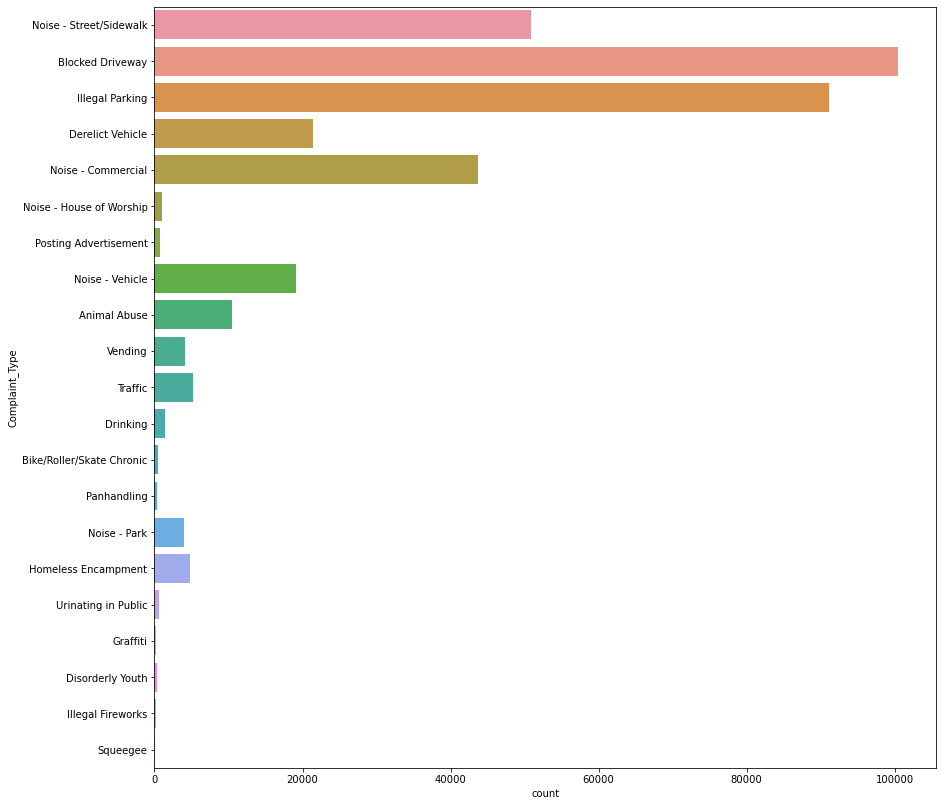

In [78]:
plt.figure(figsize=(14,14))
sns.countplot(y='Complaint_Type',data=data)


#Inference:- Below are are the details top 10 types of complaints

In [79]:
data.value_counts('Complaint_Type').head(10)

Complaint_Type
Blocked Driveway           100496
Illegal Parking             91093
Noise - Street/Sidewalk     50804
Noise - Commercial          43633
Derelict Vehicle            21428
Noise - Vehicle             19125
Animal Abuse                10503
Traffic                      5170
Homeless Encampment          4830
Vending                      4165
dtype: int64

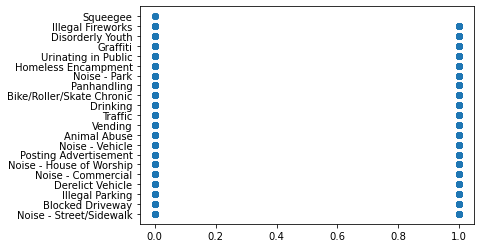

In [80]:
plt.scatter(data['City']=='BROOKLYN',data['Complaint_Type'])

In [81]:
e=data.loc[data.City=='BROOKLYN']

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

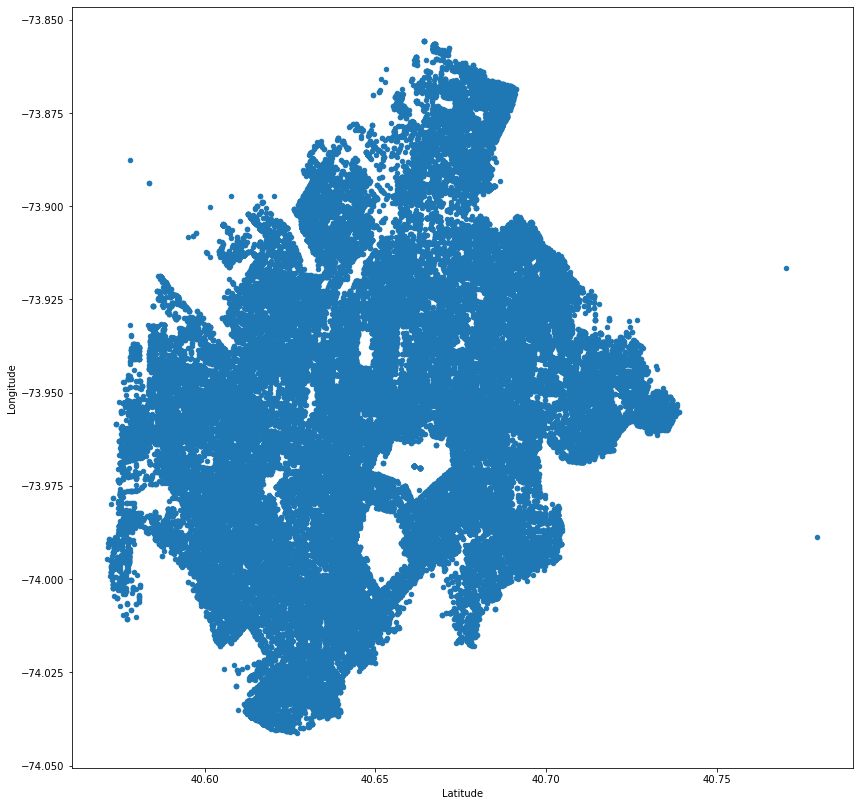

In [82]:
e.plot(kind='scatter',x='Latitude',y='Longitude',figsize=(14,14))

In [83]:
data.City.unique()

array(['NEW_YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW_GARDENS', 'JACKSON_HEIGHTS', 'MIDDLE_VILLAGE', 'REGO_PARK',
       'SAINT_ALBANS', 'JAMAICA', 'SOUTH_RICHMOND_HILL', 'RIDGEWOOD',
       'HOWARD_BEACH', 'FOREST_HILLS', 'STATEN_ISLAND', 'OZONE_PARK',
       'RICHMOND_HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS_VILLAGE', 'OAKLAND_GARDENS', 'HOLLIS', 'MASPETH',
       'EAST_ELMHURST', 'SOUTH_OZONE_PARK', 'WOODSIDE', 'FRESH_MEADOWS',
       'LONG_ISLAND_CITY', 'ROCKAWAY_PARK', 'SPRINGFIELD_GARDENS',
       'COLLEGE_POINT', 'BAYSIDE', 'GLEN_OAKS', 'FAR_ROCKAWAY',
       'BELLEROSE', 'LITTLE_NECK', 'CAMBRIA_HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL_PARK',
       'NEW_HYDE_PARK', 'CENTRAL_PARK', 'BREEZY_POINT', 'QUEENS'],
      dtype=object)

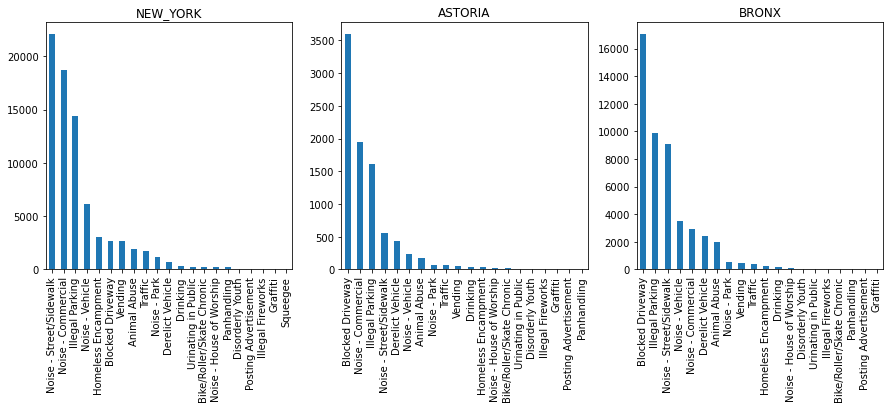

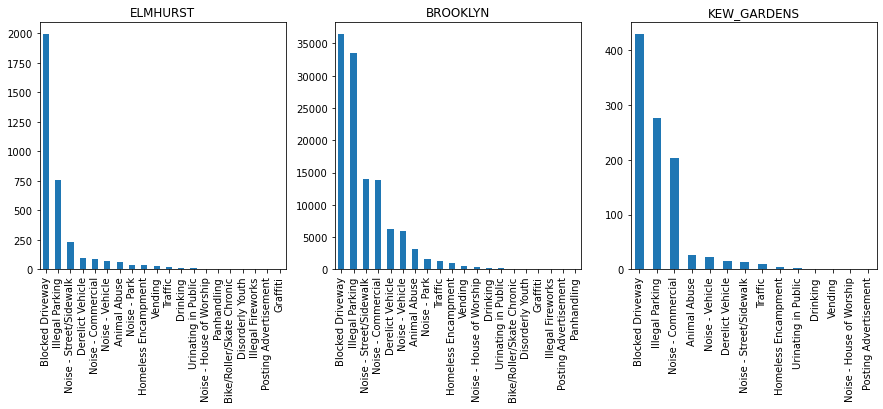

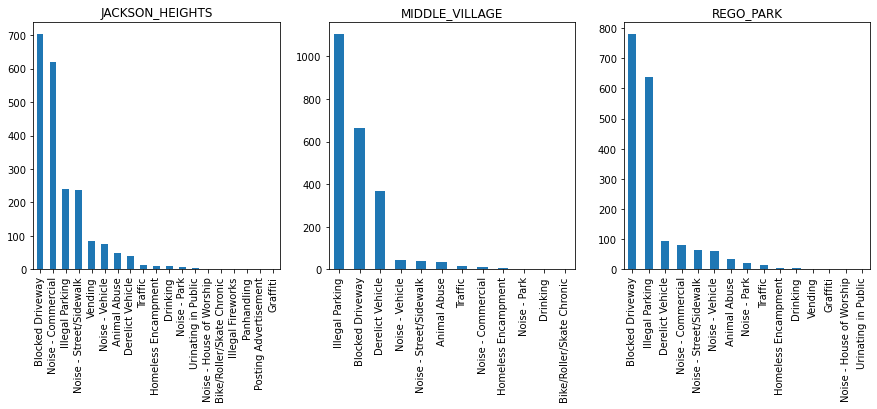

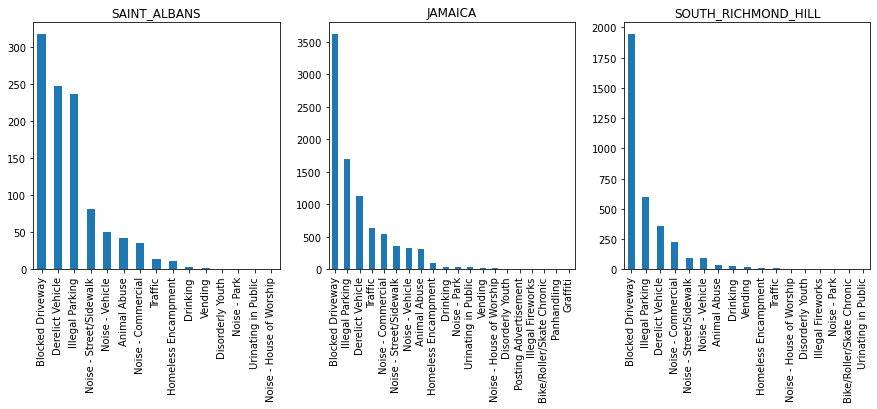

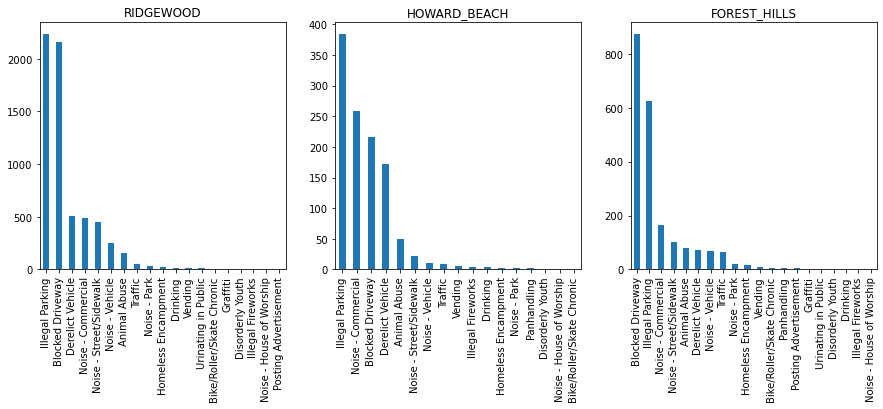

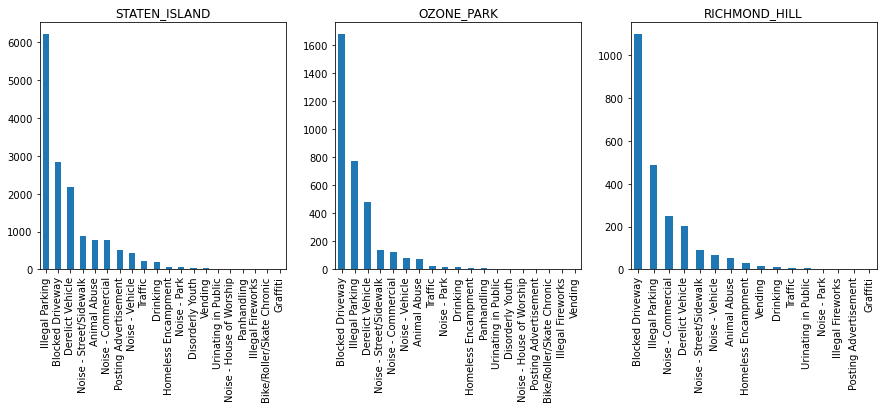

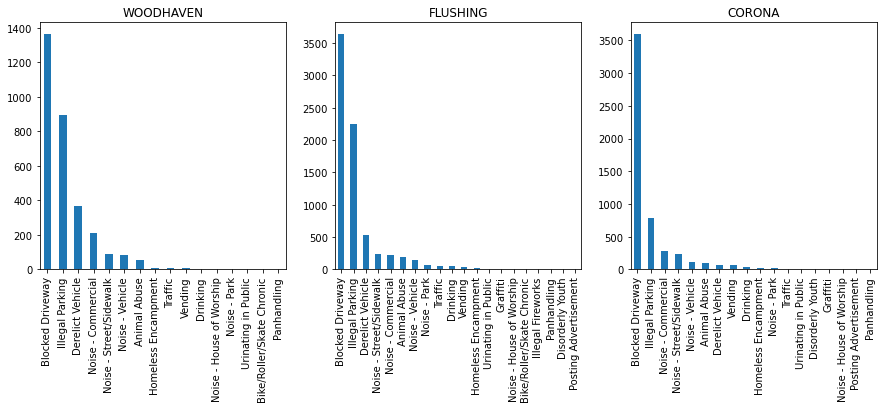

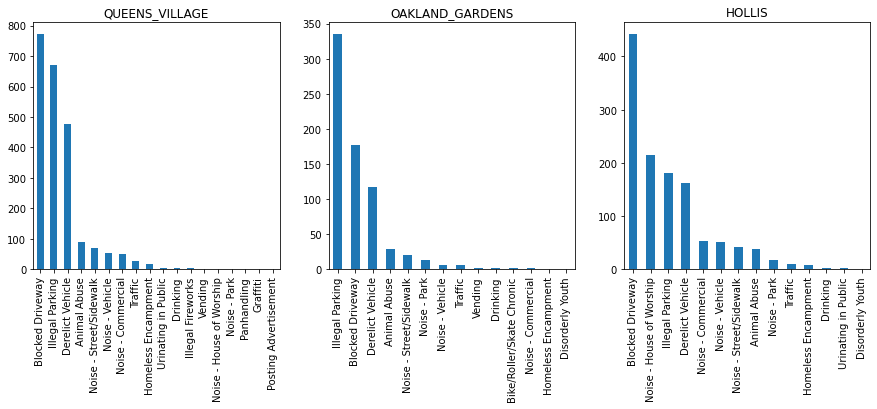

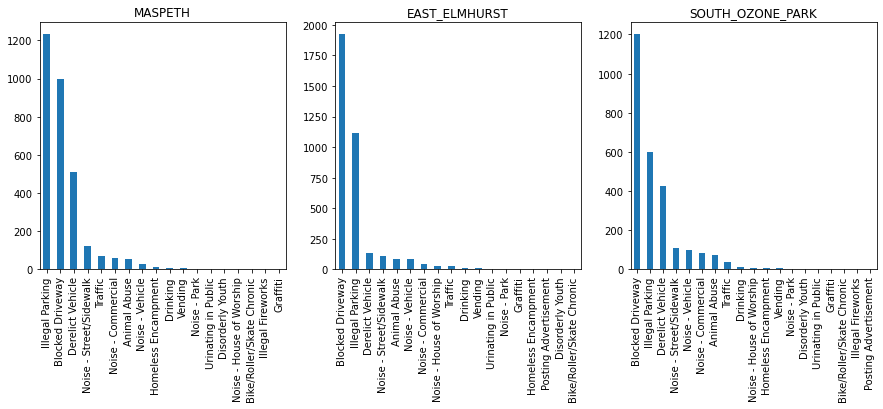

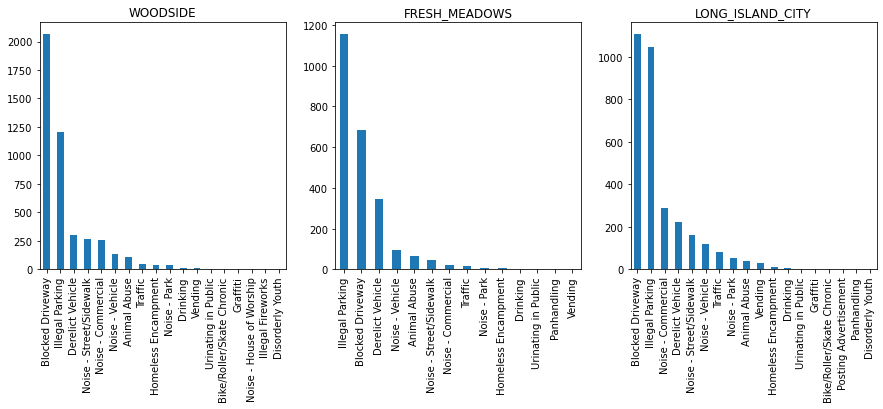

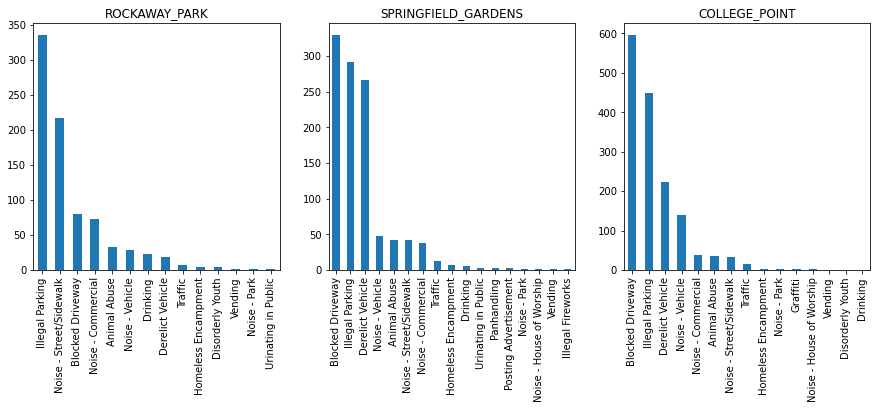

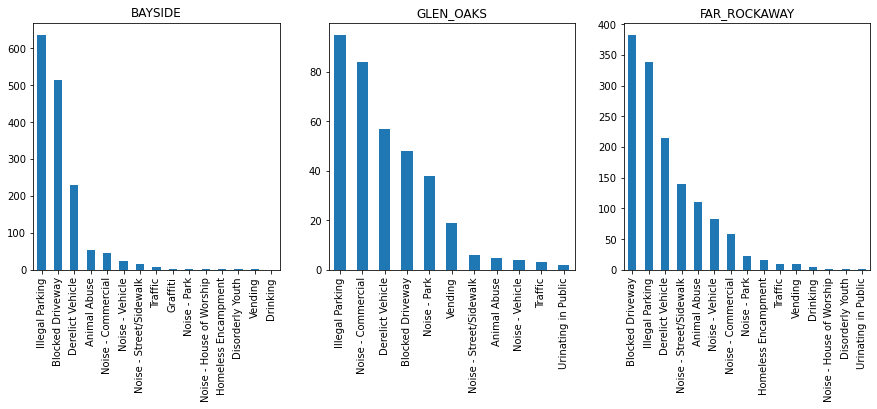

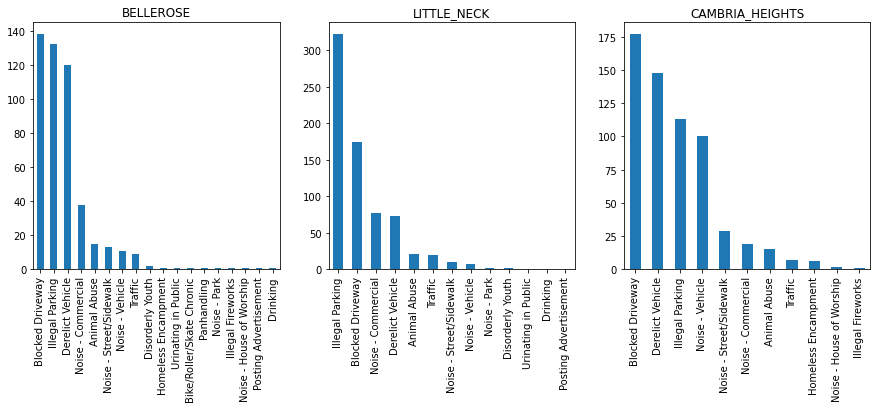

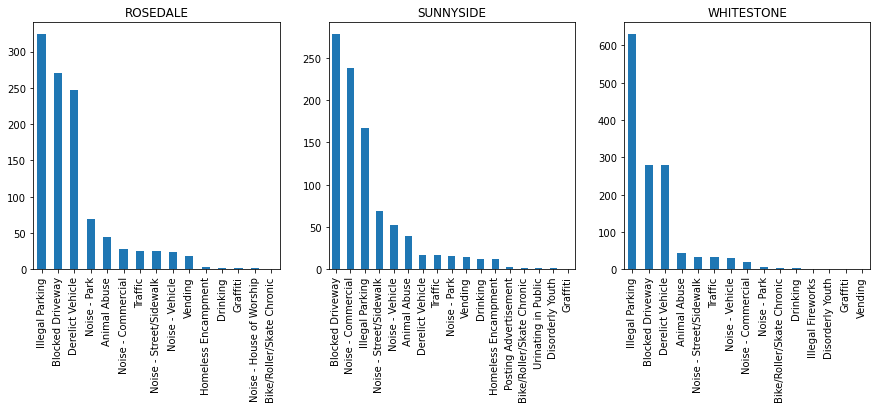

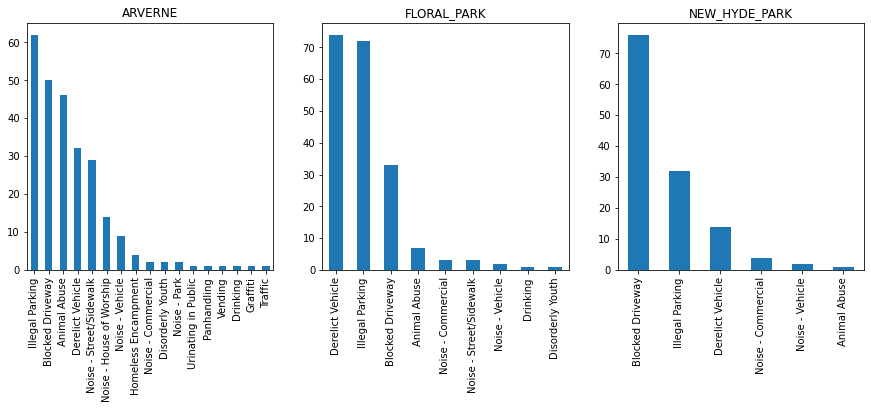

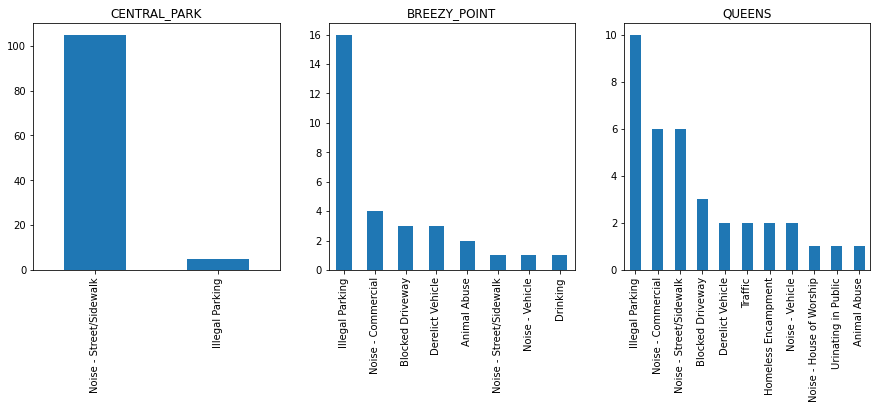

<Figure size 1080x720 with 0 Axes>

In [84]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(data.City.unique()):
    if ix <= 3:
        ax2 = fig.add_subplot(2,3,ix+3)
        ax2.tick_params(axis='x', labelrotation=90)
        t=data.groupby('City').get_group(c)['Complaint_Type'].value_counts()
        t.plot(kind='bar')
        plt.title(c)
         #for boxplot
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

In [85]:
data.groupby('City').get_group('NEW_YORK')['Complaint_Type'].value_counts()

Noise - Street/Sidewalk      22083
Noise - Commercial           18669
Illegal Parking              14369
Noise - Vehicle               6179
Homeless Encampment           3022
Blocked Driveway              2688
Vending                       2621
Animal Abuse                  1926
Traffic                       1754
Noise - Park                  1201
Derelict Vehicle               688
Drinking                       320
Urinating in Public            264
Bike/Roller/Skate Chronic      249
Noise - House of Worship       217
Panhandling                    203
Disorderly Youth                80
Posting Advertisement           49
Illegal Fireworks               34
Graffiti                        25
Squeegee                         4
Name: Complaint_Type, dtype: int64

In [86]:
#print(data['Closed_Date']-data['Created_Date'])
data['Resopnse_Time']=data['Closed_Date']-data['Created_Date']

In [87]:
data.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Complaint_Type',
       'Incident_Zip', 'City', 'Status', 'Due_Date', 'Resolution_Description',
       'Resolution_Action_Updated_Date', 'Borough', 'Latitude', 'Longitude',
       'Resopnse_Time'],
      dtype='object')

In [88]:
data.head()

,Unique_Key,Created_Date,Closed_Date,Agency,Complaint_Type,Incident_Zip,City,Status,Due_Date,Resolution_Description,Resolution_Action_Updated_Date,Borough,Latitude,Longitude,Resopnse_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,Noise - Street/Sidewalk,10034.0,NEW_YORK,Closed,2016-01-01 07:59:45,The Police Department responded and upon arriv...,2016-01-01 00:55:15,MANHATTAN,40.865682,-73.923501,0 days 00:55:30
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,Blocked Driveway,11105.0,ASTORIA,Closed,2016-01-01 07:59:44,The Police Department responded to the complai...,2016-01-01 01:26:57,QUEENS,40.775945,-73.915094,0 days 01:27:13
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,Blocked Driveway,10458.0,BRONX,Closed,2016-01-01 07:59:29,The Police Department responded and upon arriv...,2016-01-01 04:51:03,BRONX,40.870325,-73.888525,0 days 04:51:34
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,Illegal Parking,10461.0,BRONX,Closed,2016-01-01 07:57:46,The Police Department responded to the complai...,2016-01-01 07:43:13,BRONX,40.835994,-73.828379,0 days 07:45:27
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,Illegal Parking,11373.0,ELMHURST,Closed,2016-01-01 07:56:58,The Police Department responded and upon arriv...,2016-01-01 03:24:42,QUEENS,40.733060,-73.874170,0 days 03:27:44


In [89]:
s=data.groupby('Complaint_Type')

In [90]:
s.get_group('Animal Abuse')['Resopnse_Time'].mean()

Timedelta('0 days 05:00:51.110920689')

In [91]:
ct=data.Complaint_Type.unique()

In [92]:
ct

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Squeegee'],
      dtype=object)

In [93]:
for i in ct:
    print(i,' ',s.get_group(i)['Resopnse_Time'].mean())

Noise - Street/Sidewalk   0 days 03:23:37.674139831
Blocked Driveway   0 days 04:30:17.264975720
Illegal Parking   0 days 04:19:44.000713556
Derelict Vehicle   0 days 07:01:20.634263580
Noise - Commercial   0 days 03:04:00.749226502
Noise - House of Worship   0 days 03:09:58.217719132
Posting Advertisement   0 days 02:01:26.256259204
Noise - Vehicle   0 days 03:29:46.409777777
Animal Abuse   0 days 05:00:51.110920689
Vending   0 days 03:59:14.285474189
Traffic   0 days 03:25:20.261508704
Drinking   0 days 03:50:03.985000
Bike/Roller/Skate Chronic   0 days 03:35:41.995680345
Panhandling   0 days 04:23:42.803125
Noise - Park   0 days 03:23:19.201701701
Homeless Encampment   0 days 04:17:54.749068322
Urinating in Public   0 days 03:35:59.293291731
Graffiti   0 days 06:27:56.343949044
Disorderly Youth   0 days 03:26:35.754777070
Illegal Fireworks   0 days 02:48:42.347305389
Squeegee   0 days 04:02:40.250000
